## About Dataset
    This dataset contains Movies and TV Shows in Netfilx.
    This dataset contains +5k unique titles on Netflix with 15 columns containing their information.
    I collected this dataset from kaggle. 
    Dataset columns are: 
    1. id                    --> The title ID on JustWatch.
    2. title                 --> The name of the title.
    3. show_type             --> TV show or movie.
    4. description           --> A brief description.
    5. release_year          --> The release year.
    6. age_certification     --> The age certification.
    7. runtime               --> The length of the episode (SHOW) or movie.
    8. genres                --> A list of genres.
    9. production_countries  --> A list of countries that produced the title.
    10. seasons              --> Number of seasons if it's a SHOW.
    11. imdb_id              --> The title ID on IMDB.
    12. imdb_score           --> Score on IMDB.
    13. imdb_votes           --> Votes on IMDB.
    14. tmdb_popularity      --> Popularity on TMDB.
    15. tmdb_score           --> Score on TMDB.
  tmdb --> The Movie Database \
  imdb --> Internet Movie Database 
 

I did Data Exploration using Pandas,Data Visualizations using Matplotlib and Seaborn \
I used Pandas_Profiling library to create a Profile Report of datafame

#### Main things done are:
1. Dealing with Null values in dataset
2. Making better scatterplots,countplots,distribution plots
3. Filtering the data according to multilple conditions

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling # To get PROFILE REPORT of dataframe

In [2]:
# Reading the dataset
df = pd.read_csv('netfilx.csv')

In [3]:
df.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   

   tmdb_popularity  tmdb_score  
0            0.600         NaN  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600

In [4]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [5]:
df.shape

(5850, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

####  Checking whether dataset contains duplicated rows or not

In [7]:
df.duplicated().sum()

0

#### Checking number of unique values in each column of dataset

In [8]:
df.nunique()

id                      5850
title                   5798
type                       2
description             5829
release_year              63
age_certification         11
runtime                  202
genres                  1726
production_countries     452
seasons                   26
imdb_id                 5447
imdb_score                80
imdb_votes              3880
tmdb_popularity         4889
tmdb_score               394
dtype: int64

#### Checking for Null values in each column of dataset

In [9]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

From above result,we can say that,there are so many Null values in some columns.

### Exploring 'type' column in dataset

In [10]:
df['type'].value_counts()

MOVIE    3744
SHOW     2106
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

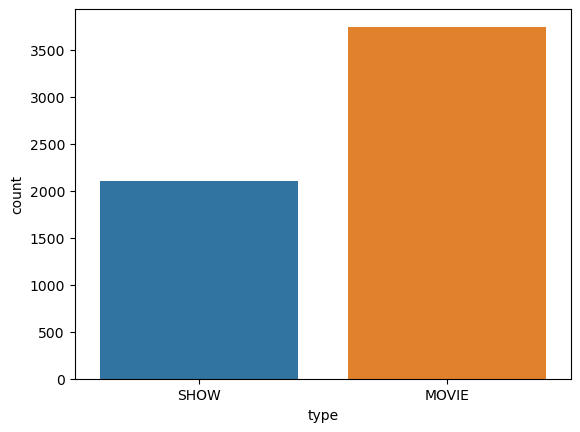

In [11]:
sns.countplot(data=df,x='type')

From above output,we can say that \
In dataset,there are more Movies than Shows

### Exploring 'release_year' column in dataset

In [12]:
df['release_year'].value_counts()

2019    836
2020    814
2021    787
2018    773
2017    563
       ... 
1960      1
1974      1
1959      1
1978      1
1945      1
Name: release_year, Length: 63, dtype: int64

Text(0, 0.5, 'Count')

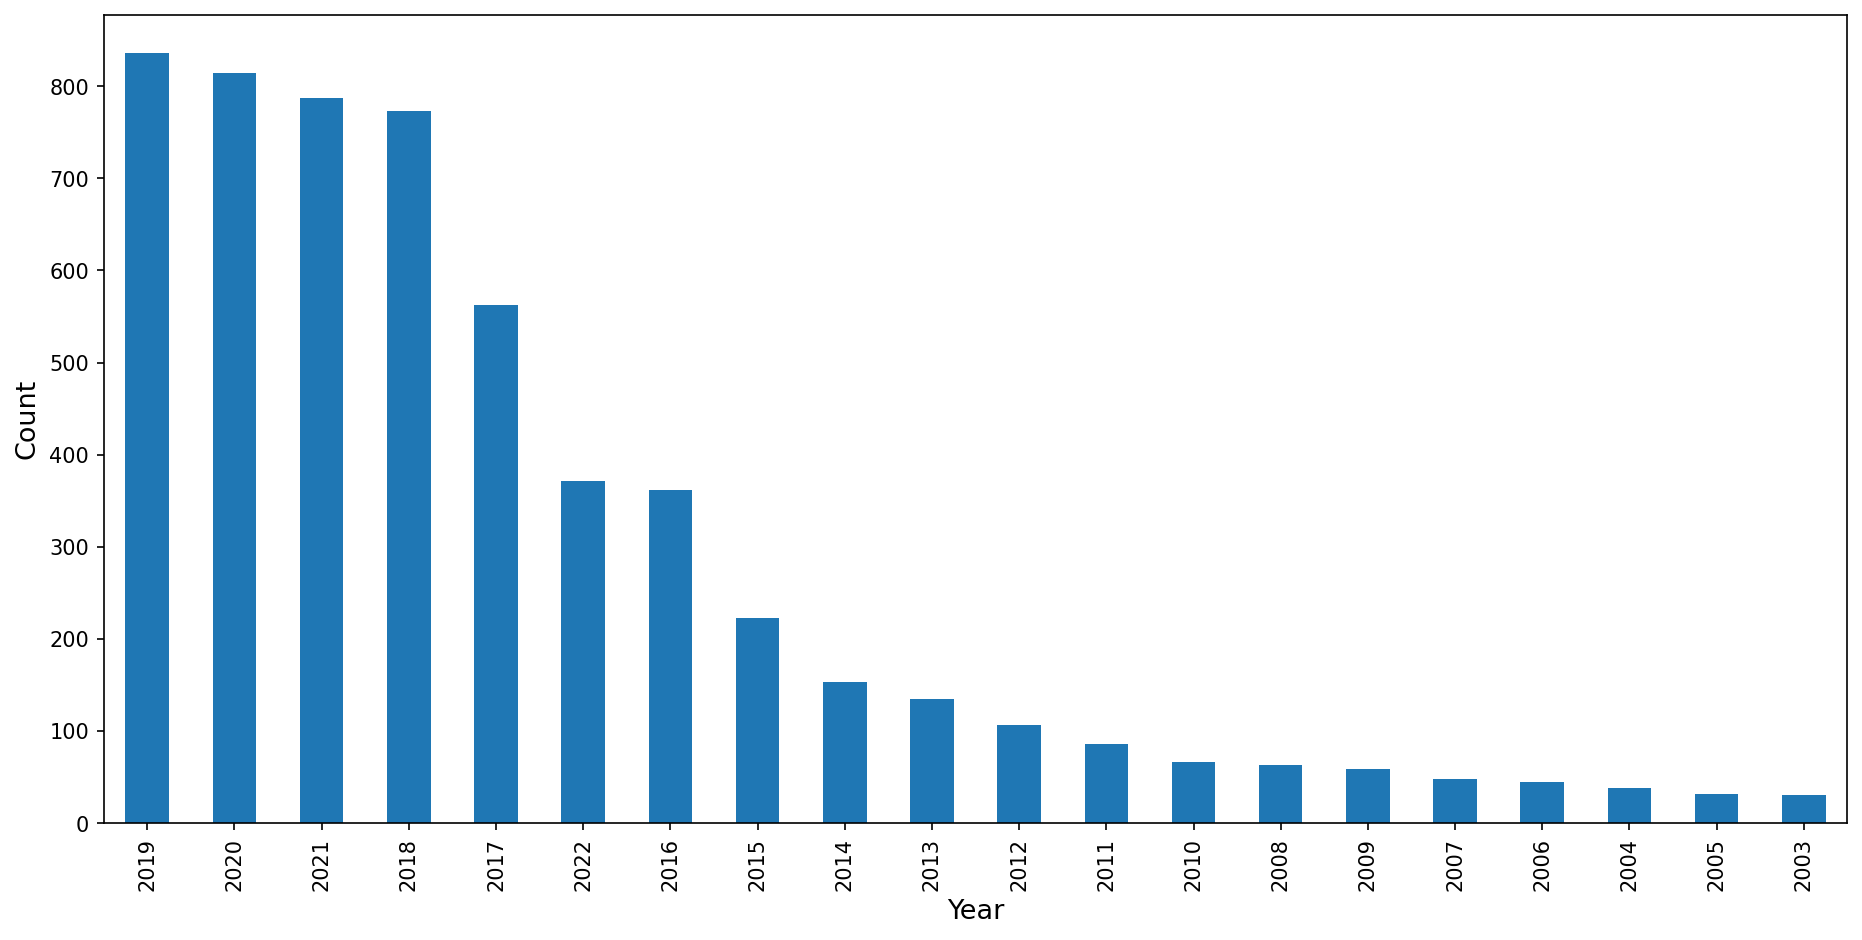

In [13]:
plt.figure(figsize=(15,7),dpi=150)
df['release_year'].value_counts()[0:20].plot(kind='bar')
plt.xlabel('Year',fontdict={'size':13})
plt.ylabel('Count',fontdict={'size':13})

### Exploring 'age_certification' column

In [14]:
df['age_certification'].value_counts()

TV-MA    883
R        556
TV-14    474
PG-13    451
PG       233
TV-PG    188
G        124
TV-Y7    120
TV-Y     107
TV-G      79
NC-17     16
Name: age_certification, dtype: int64

<AxesSubplot:xlabel='age_certification', ylabel='count'>

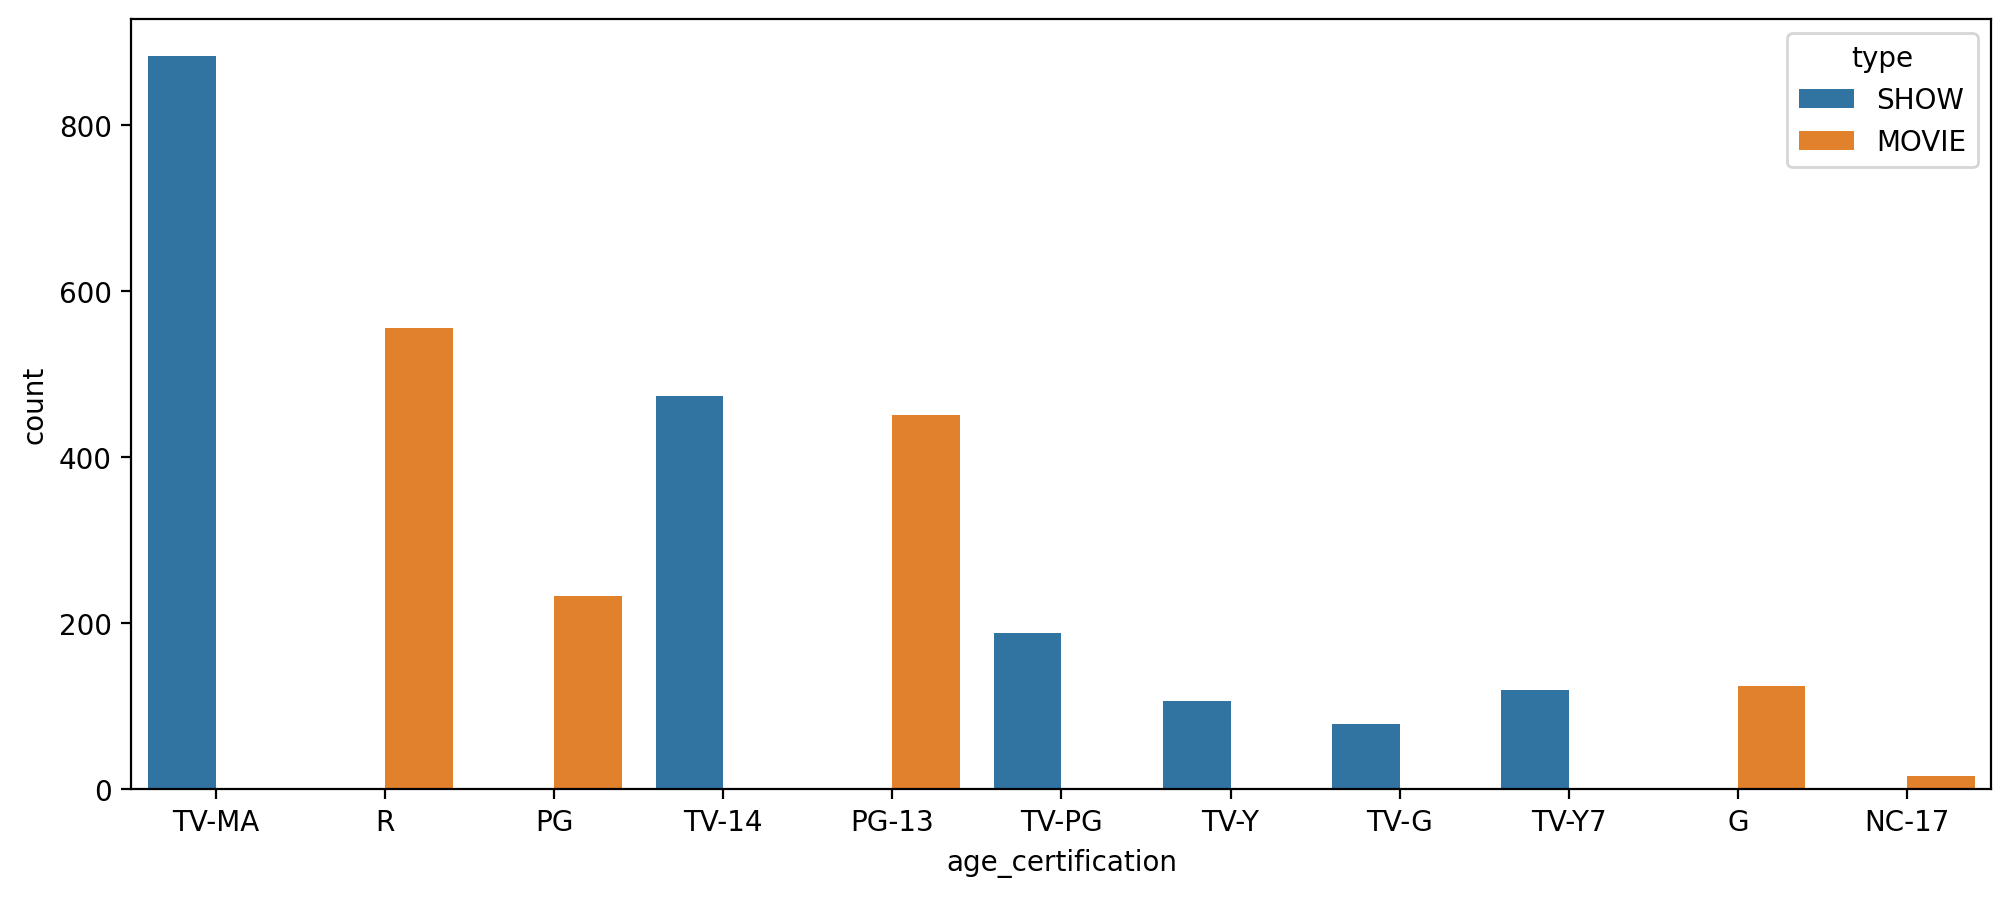

In [15]:
plt.figure(figsize = (12,5),dpi=200)
sns.countplot(x='age_certification',data = df,hue='type')

### Dealing with NULL values

### Dealing with NULL values in 'seasons' column

In [16]:
df['seasons'].isnull().sum()

3744

From above output,We can say that, \
There are many Null values in 'seasons' column,, Also number of NULL values equal to number of MOVIE's \
So,We can replace NULL values with 0 in 'seasons' column

In [17]:
# Filling NULL values with zero
df['seasons'].fillna(value=0,inplace=True)

In [18]:
df['seasons'].isnull().sum()

0

### Dealing with NULL values in 'imdb_id' column

Creating an other dataframe which contains those rows in which 'imdb_id' is NULL

In [19]:
imdb_null_df = df[df['imdb_id'].isnull()]

In [20]:
imdb_null_df.notnull().sum()

id                      403
title                   403
type                    403
description             392
release_year            403
age_certification       163
runtime                 403
genres                  403
production_countries    403
seasons                 403
imdb_id                   0
imdb_score                0
imdb_votes                0
tmdb_popularity         399
tmdb_score              348
dtype: int64

0 notnull values means all are null values

From above output,We can say that,, \
Those Movie's/TV Shows who have 'imdb_id' as NULL also have 'imdb_score' and 'imdb_votes' as NULL

#### Removing those rows in which 'imdb_id' is null 

In [21]:
df.dropna(axis=0,subset='imdb_id',inplace=True)

In [22]:
df.isnull().sum()

id                         0
title                      1
type                       0
description                7
release_year               0
age_certification       2379
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                    0
imdb_score                79
imdb_votes                95
tmdb_popularity           87
tmdb_score               256
dtype: int64

In [23]:
df.head()

id                            title   type  \
1   tm84618                      Taxi Driver  MOVIE   
2  tm154986                      Deliverance  MOVIE   
3  tm127384  Monty Python and the Holy Grail  MOVIE   
4  tm120801                  The Dirty Dozen  MOVIE   
5   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   
5  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime                                       genres  \
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   
5             TV-14       30                       ['comedy', 'european']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
1               ['US']      0.0  tt0075314         8.2    808582.0   
2               ['US']      0.0  tt0068473         7.7    107673.0   
3               ['GB']      0.0  tt0071853         8.2    534486.0   
4         ['GB', 'US']      0.0  tt0061578         7.7     72662.0   
5               ['GB']      4.0  tt0063929         8.8     73424.0   

   tmdb_popularity  tmdb_score  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600  
5           17.617       8.306

### Dealing with NULL values in 'imdb_score' column

In [24]:
# Checking NULL values 
df['imdb_score'].isnull().sum()

79

In [25]:
# Replacing NULL values in 'imdb_score' column
df['imdb_score'].fillna(value=0,inplace=True)

In [26]:
df.isnull().sum()

id                         0
title                      1
type                       0
description                7
release_year               0
age_certification       2379
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                    0
imdb_score                 0
imdb_votes                95
tmdb_popularity           87
tmdb_score               256
dtype: int64

### Dealing with NULL values in 'tmdb_score' column

In [27]:
# Checking NULL values 
df['tmdb_score'].isnull().sum()

256

In [28]:
# Replacing NULL values in 'tmdb_score' column
df['tmdb_score'].fillna(value=0,inplace=True)

In [29]:
# Checking NULL values 
df['tmdb_score'].isnull().sum()

0

### Exploring 'imdb_score' column

In [30]:
df['imdb_score'].describe()

count    5447.000000
mean        6.416431
std         1.393146
min         0.000000
25%         5.700000
50%         6.600000
75%         7.300000
max         9.600000
Name: imdb_score, dtype: float64

#### Top 20 Movie's and Shows according to imdb_score

In [31]:
df.sort_values('imdb_score',axis=0,ascending=False)[:20][['title','type','genres','release_year','imdb_score']].reset_index()

index                                       title   type  \
0    2658                                    #ABtalks   SHOW   
1     564                                    Khawatir   SHOW   
2     216                                Breaking Bad   SHOW   
3     233                  Avatar: The Last Airbender   SHOW   
4    3147                                  Our Planet   SHOW   
5    1258                                  Reply 1988   SHOW   
6    1886                                   My Mister   SHOW   
7    4771                                       Major  MOVIE   
8    1092           Chhota Bheem & Krishna vs Zimbara  MOVIE   
9    3068                              The Last Dance   SHOW   
10   3500                                Kota Factory   SHOW   
11   1158  Leah Remini: Scientology and the Aftermath   SHOW   
12    165                                      Okupas   SHOW   
13    243                                  DEATH NOTE   SHOW   
14    653                             Hunter x Hunter   SHOW   
15   4718                                      Arcane   SHOW   
16    835                             Attack on Titan   SHOW   
17    103                                Cowboy Bebop   SHOW   
18    320                                  Still Game   SHOW   
19   1033             Raja, Rasoi Aur Anya Kahaniyaan   SHOW   

                                               genres  release_year  \
0                                                  []          2018   
1                                         ['reality']          2005   
2                      ['drama', 'crime', 'thriller']          2008   
3   ['scifi', 'animation', 'action', 'family', 'fa...          2005   
4                                   ['documentation']          2019   
5            ['comedy', 'drama', 'family', 'romance']          2015   
6                                 ['drama', 'family']          2018   
7                                 ['action', 'drama']          2022   
8                                       ['animation']          2013   
9               ['documentation', 'history', 'sport']          2020   
10                                ['drama', 'comedy']          2019   
11                       ['documentation', 'history']          2016   
12                                 ['drama', 'crime']          2000   
13  ['animation', 'thriller', 'scifi', 'drama', 'f...          2006   
14       ['action', 'animation', 'comedy', 'fantasy']          2011   
15  ['scifi', 'action', 'drama', 'animation', 'fan...          2021   
16  ['action', 'scifi', 'animation', 'horror', 'dr...          2013   
17  ['animation', 'action', 'scifi', 'western', 'c...          1998   
18                             ['comedy', 'european']          2002   
19                       ['history', 'documentation']          2014   

    imdb_score  
0          9.6  
1          9.5  
2          9.5  
3          9.3  
4          9.3  
5          9.2  
6          9.1  
7          9.1  
8          9.1  
9          9.1  
10         9.1  
11         9.0  
12         9.0  
13         9.0  
14         9.0  
15         9.0  
16         9.0  
17         8.9  
18         8.9  
19         8.9

### Exploring 'tmdb_score' column

In [32]:
df['tmdb_score'].describe()

count    5447.000000
mean        6.502662
std         1.828598
min         0.000000
25%         6.000000
50%         6.800000
75%         7.500000
max        10.000000
Name: tmdb_score, dtype: float64

#### Top 20 Movie's and Shows according to tmdb_score

In [33]:
df.sort_values('tmdb_score',axis=0,ascending=False)[:20][['title','type','genres','release_year','tmdb_score']].reset_index()

index                                              title   type  \
0    5849                 Mighty Little Bheem: Kite Festival   SHOW   
1    5376                                         Super PupZ   SHOW   
2    4296                                   Singapore Social   SHOW   
3    4664                                    Fate of Alakada  MOVIE   
4    4688                        Mighty Little Bheem: Diwali   SHOW   
5    4289                               True: Friendship Day  MOVIE   
6    4273                      Legend Quest: Masters of Myth   SHOW   
7    2032                  Transformers: Rescue Bots Academy   SHOW   
8    4265                              Secreto bien guardado   SHOW   
9    4202                                    A Queen Is Born   SHOW   
10   4175                                    Lugar de Mulher   SHOW   
11   2126                                    Rainbow Rangers   SHOW   
12   4057               Octonauts and the Great Barrier Reef  MOVIE   
13   4051                              How To Ruin Christmas   SHOW   
14   4004                                        Youth v Gov  MOVIE   
15   3945                                         The Writer   SHOW   
16   5181                                   Civil: Ben Crump  MOVIE   
17   3895                        The Queen and the Conqueror   SHOW   
18   5013  Like A Rolling Stone: The Life & Times of Ben ...  MOVIE   
19   3776                               Cooked With Cannabis   SHOW   

                                               genres  release_year  \
0                   ['family', 'animation', 'comedy']          2021   
1            ['comedy', 'family', 'fantasy', 'scifi']          2022   
2                                         ['reality']          2019   
3                                          ['comedy']          2020   
4                             ['comedy', 'animation']          2019   
5                             ['animation', 'family']          2020   
6                             ['animation', 'action']          2019   
7   ['animation', 'comedy', 'family', 'scifi', 'ac...          2018   
8                                ['drama', 'romance']          2019   
9                                         ['reality']          2020   
10                                         ['comedy']          2019   
11                 ['animation', 'family', 'fantasy']          2018   
12        ['animation', 'action', 'comedy', 'family']          2020   
13                                ['drama', 'comedy']          2020   
14                                  ['documentation']          2020   
15                                 ['drama', 'crime']          2019   
16                                  ['documentation']          2022   
17                               ['drama', 'history']          2020   
18                                  ['documentation']          2021   
19                                        ['reality']          2020   

    tmdb_score  
0         10.0  
1         10.0  
2         10.0  
3         10.0  
4         10.0  
5         10.0  
6         10.0  
7         10.0  
8         10.0  
9         10.0  
10        10.0  
11        10.0  
12        10.0  
13        10.0  
14        10.0  
15        10.0  
16        10.0  
17        10.0  
18        10.0  
19        10.0

### Distribution of 'imdb_score' and 'tmdb_score'

(0.0, 10.0)

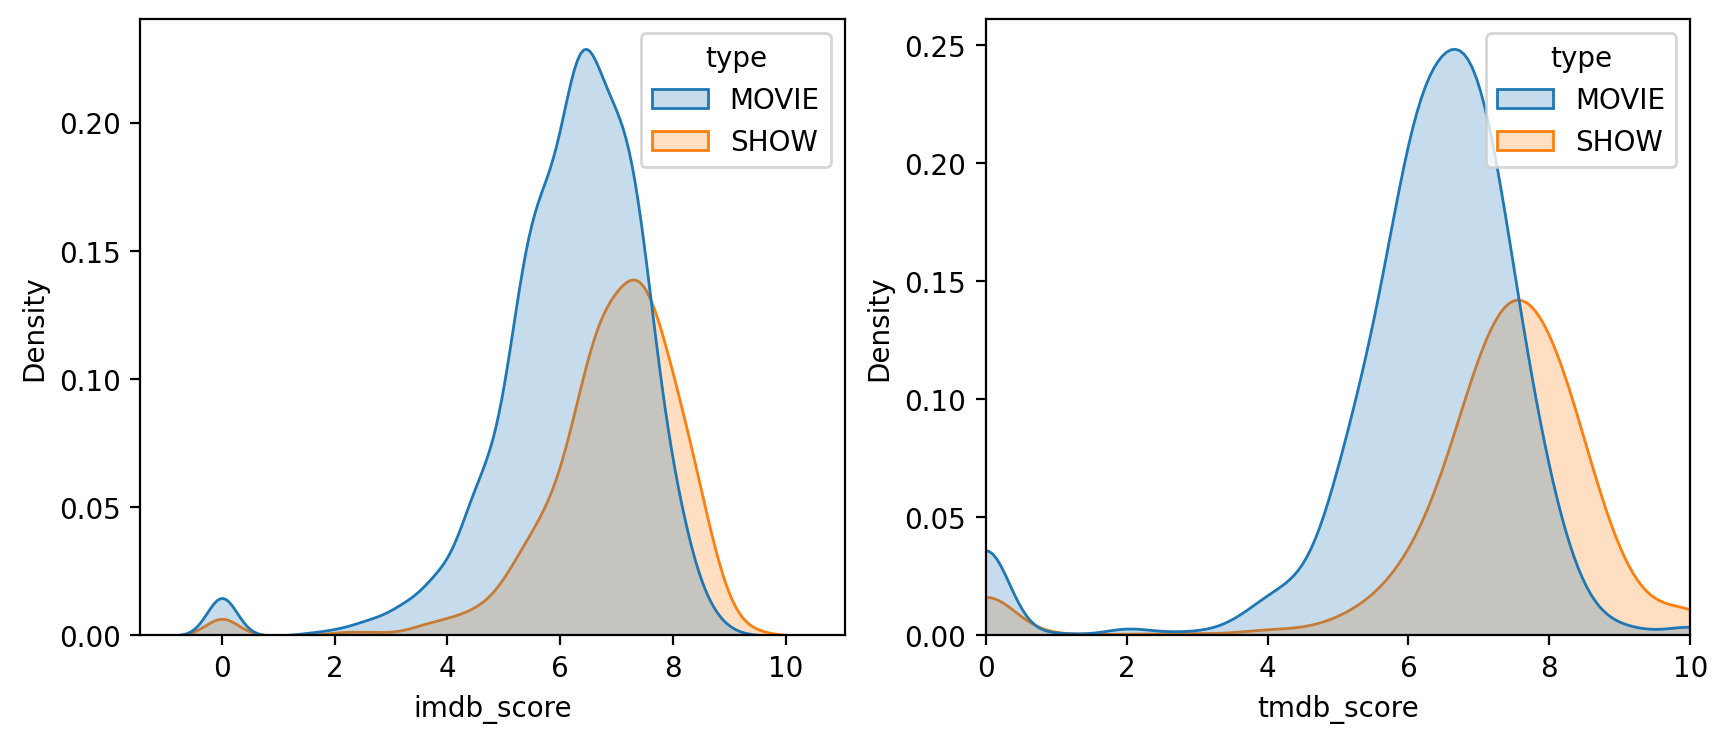

In [34]:
fig,ax=plt.subplots(ncols=2,figsize=(10,4),dpi=200)
sns.kdeplot(df['imdb_score'],hue=df['type'],fill=True,ax=ax[0])
sns.kdeplot(df['tmdb_score'],hue=df['type'],fill=True,ax=ax[1])
plt.xlim(0,10)

In [35]:
len(df)

5447

### Scatterplot between imdb_score and tmdb_score

Text(0, 0.5, 'tmdb_score')

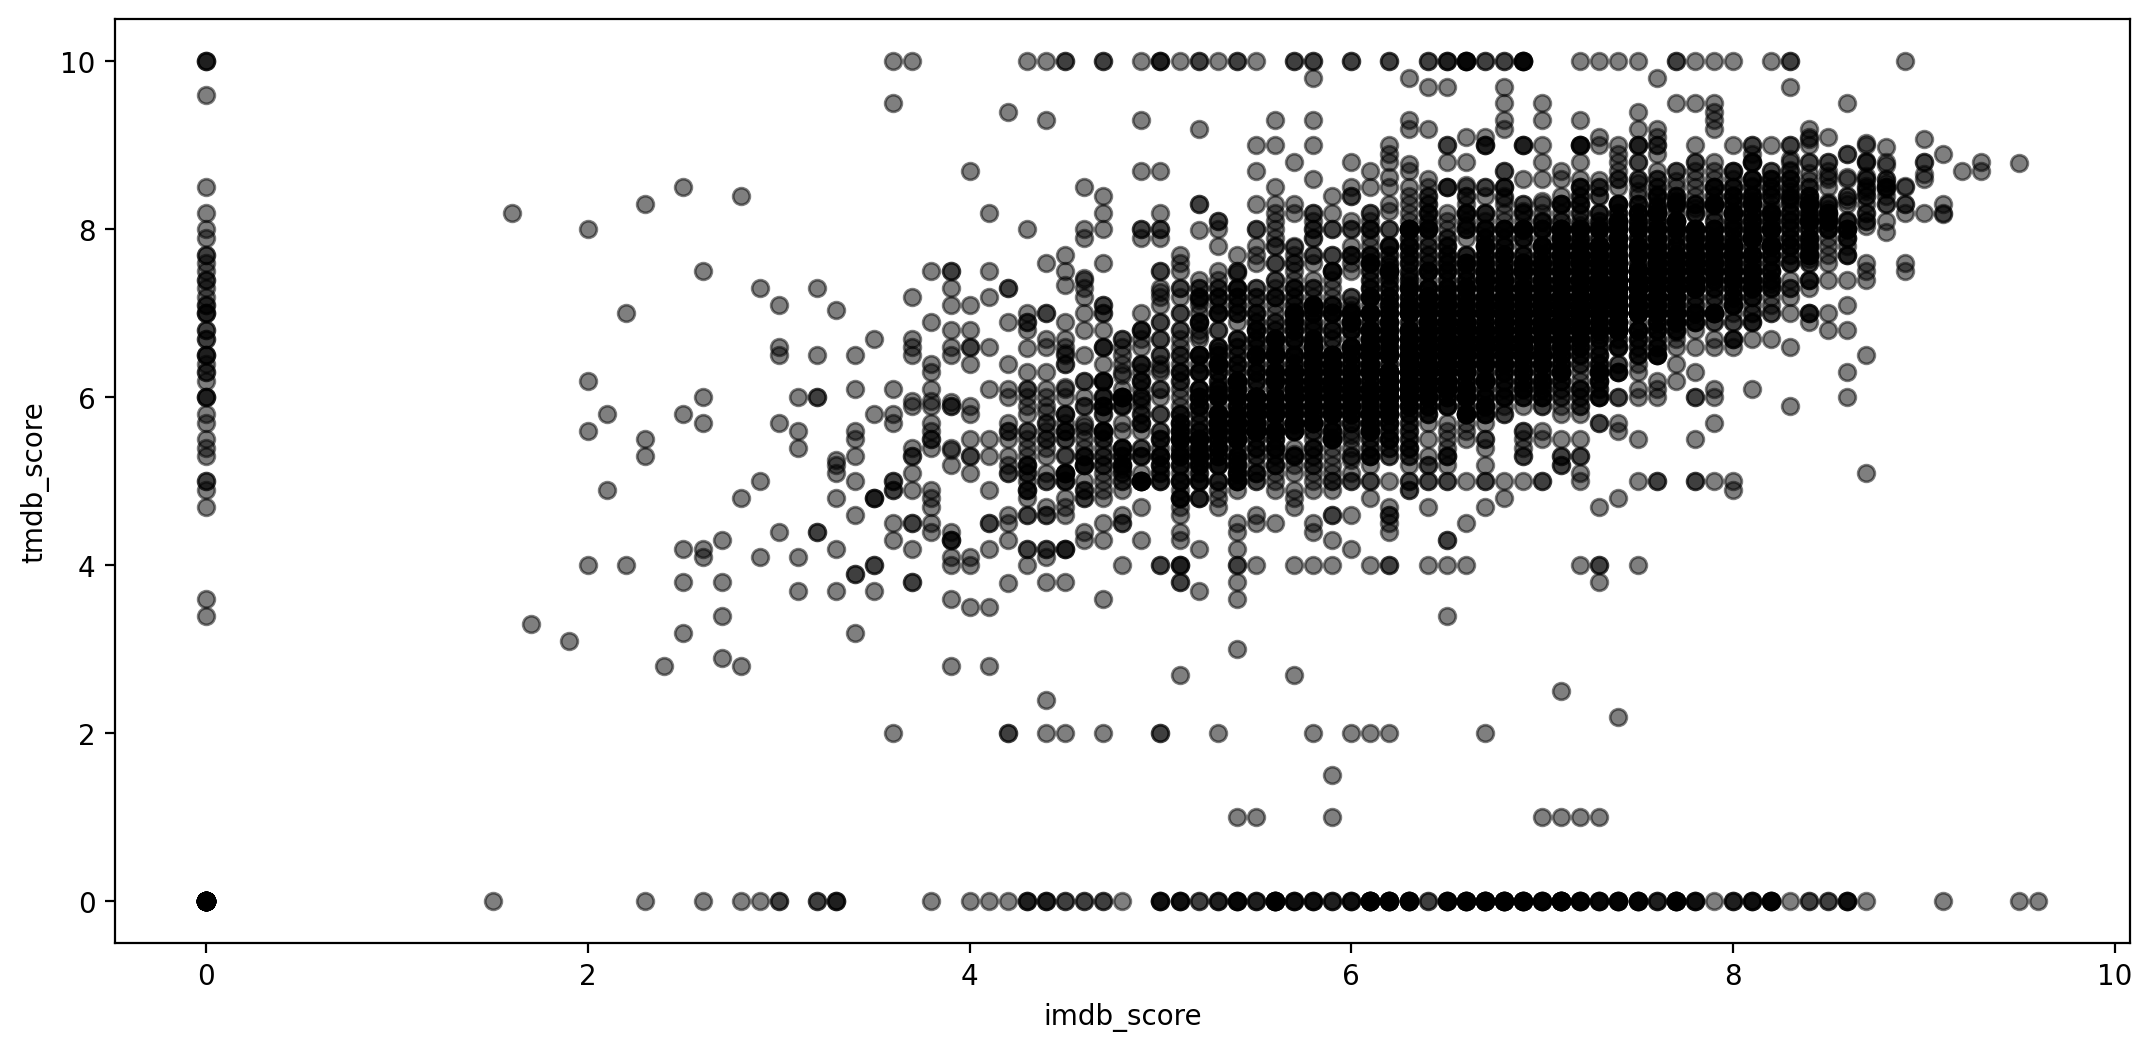

In [36]:
plt.figure(figsize=(13,6),dpi=200)
plt.scatter(x=df['imdb_score'],y=df['tmdb_score'],color='black',alpha=0.5)
plt.xlabel('imdb_score')
plt.ylabel('tmdb_score')

From above plot,We can say that, \
For some Movie's/Shows imdb_score&tmdb_score have so much difference

In [37]:
# Getting those rows in which 'imdb_score' is Zero AND 'tmdb_score' greater than 5
df.loc[ (df['imdb_score']==0) & (df['tmdb_score']>=5)][['title','type','genres','release_year','tmdb_score']]

title   type  \
471                       Monty Python Conquers America  MOVIE   
923                                      Bonnie & Clyde  MOVIE   
1305                                          The Visit  MOVIE   
1921  Never Stop Dreaming: The Life and Legacy of Sh...  MOVIE   
2653              Falling in Love Like a Romantic Drama   SHOW   
2803                                         The Trader  MOVIE   
2822                        Joaquín Reyes: Una y no más  MOVIE   
2833                                               Zion  MOVIE   
3267                                              Anima  MOVIE   
3279                American Pie Presents: Girls' Rules  MOVIE   
3496  The Lonely Island Presents: The Unauthorized B...  MOVIE   
3548                                             Ne Zha  MOVIE   
3627                                    Extracurricular   SHOW   
3663                                          Diagnosis   SHOW   
3671                                             Babies   SHOW   
3685                                          Chocolate   SHOW   
3696                                  The Letter Reader  MOVIE   
3773                                          Followers   SHOW   
3789                                        Unstoppable   SHOW   
3903                                        The Present  MOVIE   
3957             Sturgill Simpson Presents Sound & Fury  MOVIE   
4124                                       Kissing Game   SHOW   
4258          Carmen Sandiego: To Steal or Not to Steal  MOVIE   
4457  The Magic School Bus Rides Again: The Frizz Co...  MOVIE   
4503                             True: Tricky Treat Day  MOVIE   
4579  Motu Patlu the Superheroes – Super Villains fr...  MOVIE   
4660                    Motu Patlu in the Game of Zones  MOVIE   
4697                                         Persuasion  MOVIE   
4709                       D.B. Cooper: Where Are You?!   SHOW   
4836                                        Jackass 4.5  MOVIE   
4876                         The Martha Mitchell Effect  MOVIE   
4948                                      Country Queen   SHOW   
5030     Pretty Guardians Sailor Moon Eternal The Movie   SHOW   
5140                              Two Distant Strangers  MOVIE   
5212                    Chip and Potato: Chip's Holiday  MOVIE   
5575                Barbie & Chelsea: The Lost Birthday  MOVIE   
5606                                         Heart Shot  MOVIE   
5607                     Hold Your Breath: The Ice Dive  MOVIE   
5613      The Wonderful: Stories from the Space Station  MOVIE   
5767                                               Erax  MOVIE   
5778                                   Quarantine Tales   SHOW   
5790                             My Heroes Were Cowboys  MOVIE   

                                  genres  release_year  tmdb_score  
471                    ['documentation']          2008         6.5  
923       ['drama', 'crime', 'european']          2013         7.5  
1305   ['thriller', 'comedy', 'romance']          2015         6.0  
1921                   ['documentation']          2018         5.5  
2653                         ['reality']          2018        10.0  
2803                   ['documentation']          2018         6.7  
2822                          ['comedy']          2017         6.0  
2833          ['documentation', 'drama']          2018         6.5  
3267                           ['music']          2019         7.4  
3279                          ['comedy']          2020         6.3  
3496                 ['comedy', 'music']          2019         6.2  
3548                         ['fantasy']          2019         8.0  
3627                  ['drama', 'crime']          2020         8.2  
3663        ['documentation', 'reality']          2019         7.9  
3671        ['documentation', 'reality']          2020         7.6  
3685                           ['drama']          2019         7.3  
3696                           ['drama

In [38]:
# Getting those rows in which 'tmdb_score' is Zero AND 'imdb_score' greater than 5
df.loc[ (df['tmdb_score']==0) & (df['imdb_score']>=5)][['title','type','genres','release_year','tmdb_score']]

title   type  \
56                           Vaashi  MOVIE   
79                           Duniya  MOVIE   
85                   Pyar Ke Do Pal  MOVIE   
411   Kung Fu Panda Awesome Secrets   SHOW   
455       DreamWorks Spooky Stories   SHOW   
...                             ...    ...   
5837    Momshies! Your Soul is Mine  MOVIE   
5839                    Kongsi Raya  MOVIE   
5841           Princess 'Daya'Reese  MOVIE   
5845                      Fine Wine  MOVIE   
5846                    C/O Kaadhal  MOVIE   

                                           genres  release_year  tmdb_score  
56                          ['drama', 'thriller']          1983         0.0  
79                            ['action', 'drama']          1984         0.0  
85                            ['drama', 'action']          1986         0.0  
411   ['action', 'animation', 'comedy', 'family']          2008         0.0  
455                                 ['animation']          2009         0.0  
...                                           ...           ...         ...  
5837                                   ['comedy']          2021         0.0  
5839                                   ['comedy']          2022         0.0  
5841                        ['comedy', 'romance']          2021         0.0  
5845                         ['romance', 'drama']          2021         0.0  
5846                                    ['drama']          2021         0.0  

[194 rows x 5 columns]

<AxesSubplot:xlabel='imdb_score', ylabel='tmdb_score'>

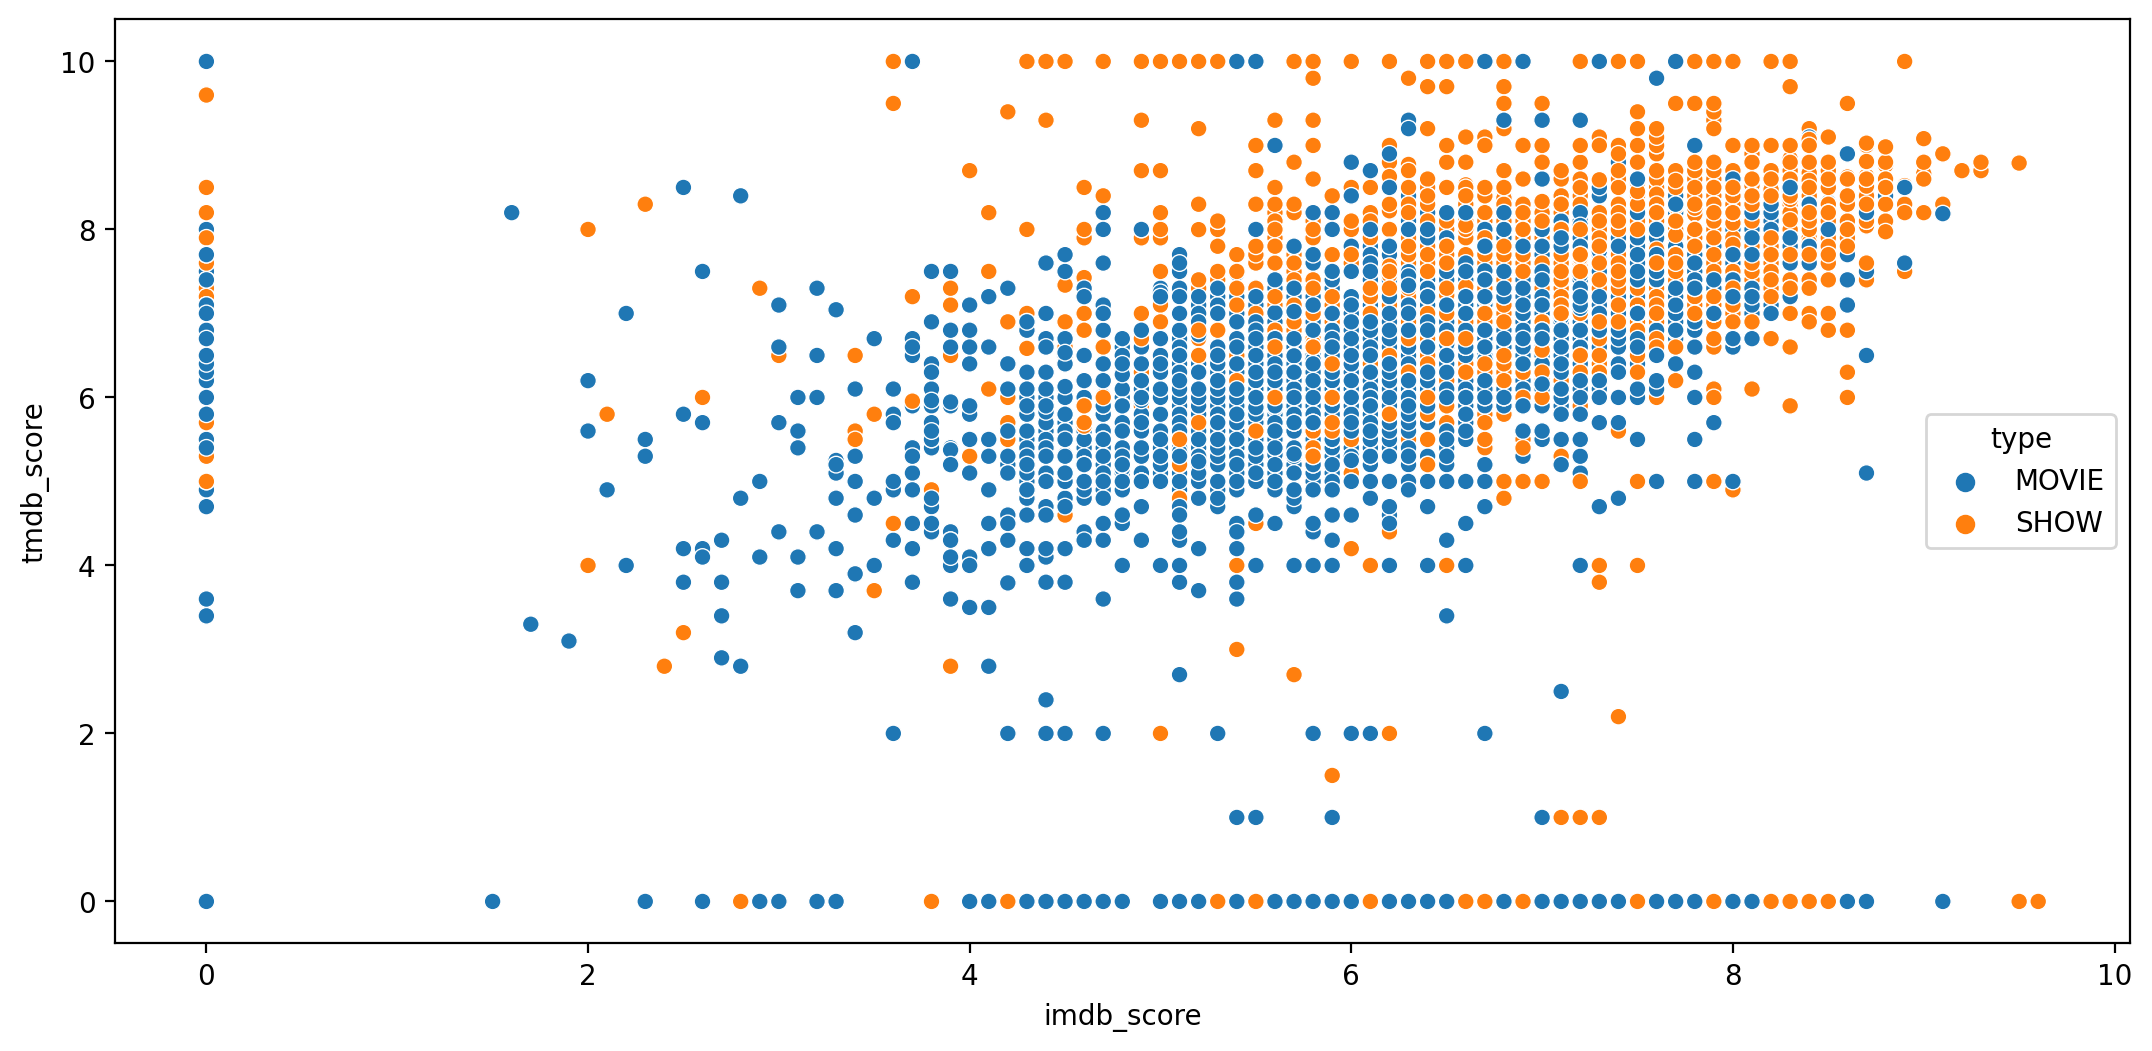

In [39]:
plt.figure(figsize=(13,6),dpi=200)
sns.scatterplot(x='imdb_score',y='tmdb_score',data=df,hue='type')

### I want to get top 10 Movies/Shows for a particular year

For that we are going to groupby the dataframe by 'release_year' AND 'type'

In [40]:
grouped_df=df[['title','type','genres','description','release_year','imdb_score','tmdb_score']].groupby(by=['release_year','type'])

In [41]:
type(grouped_df)

pandas.core.groupby.generic.DataFrameGroupBy

In [42]:
# Getting a particular sub-group of grouped_df
grouped_df.get_group((2022,'SHOW'))

title  type  \
4693            Resident Evil  SHOW   
4700       The Lincoln Lawyer  SHOW   
4701              Man vs. Bee  SHOW   
4704  How to Change Your Mind  SHOW   
4705     God's Favorite Idiot  SHOW   
...                       ...   ...   
5671   The Big Shot Game Show  SHOW   
5689              Finding Ola  SHOW   
5695           He's Expecting  SHOW   
5760               Byron Baes  SHOW   
5785       Only Jokes Allowed  SHOW   

                                         genres  \
4693  ['scifi', 'thriller', 'action', 'horror']   
4700             ['crime', 'drama', 'thriller']   
4701                       ['comedy', 'family']   
4704                          ['documentation']   
4705                      ['comedy', 'fantasy']   
...                                         ...   
5671                                ['reality']   
5689                        ['comedy', 'drama']   
5695  ['drama', 'comedy', 'romance', 'fantasy']   
5760                                ['reality']   
5785                                 ['comedy']   

                                            description  release_year  \
4693  Nearly three decades after the discovery of th...          2022   
4700  Sidelined after an accident, hotshot Los Angel...          2022   
4701  A man finds himself at war with a bee while ho...          2022   
4704  Author Michael Pollan leads the way in this do...          2022   
4705  Clark Thompson, a midlevel tech-support employ...          2022   
...                                                 ...           ...   
5671  Brazilian entrepreneurs pitch their ideas to a...          2022   
5689  After a life-altering event, Ola Abd ElSabour ...          2022   
5695  When a successful ad executive who's got it al...          2022   
5760  Australian influencers flock to Byron Bay for ...          2022   
5785  Six of South Africa's top comedians take cente...          2022   

      imdb_score  tmdb_score  
4693         3.7       5.956  
4700         7.7       8.100  
4701         6.8       7.477  
4704         8.2       7.000  
4705         5.7       7.000  
...          ...         ...  
5671         6.2      10.000  
5689         7.5       0.000  
5695         2.0       4.000  
5760         2.6       6.000  
5785         4.9      10.000  

[161 rows x 7 columns]

In [43]:
# Getting a particular sub-group of grouped_df
grouped_df.get_group((2022,'MOVIE'))

title   type  \
4692                             The Gray Man  MOVIE   
4694                                      RRR  MOVIE   
4696                     The Man from Toronto  MOVIE   
4697                               Persuasion  MOVIE   
4698                                   Hustle  MOVIE   
...                                       ...    ...   
5767                                     Erax  MOVIE   
5803               Let's Tie the Knot, Honey!  MOVIE   
5805  Rodrigo Sant'anna: I'm Here, I'm Queer!  MOVIE   
5811           Celeb Five: Behind the Curtain  MOVIE   
5839                              Kongsi Raya  MOVIE   

                                                 genres  \
4692                             ['thriller', 'action']   
4694                                ['drama', 'action']   
4696  ['action', 'thriller', 'drama', 'romance', 'co...   
4697                     ['romance', 'drama', 'comedy']   
4698                       ['drama', 'sport', 'comedy']   
...                                                 ...   
5767                                       ['thriller']   
5803                              ['comedy', 'romance']   
5805                                         ['comedy']   
5811                        ['comedy', 'documentation']   
5839                                         ['comedy']   

                                            description  release_year  \
4692  When a shadowy CIA agent uncovers damning agen...          2022   
4694  A fictional history of two legendary revolutio...          2022   
4696  In a case of mistaken identity, the world’s de...          2022   
4697  Living with her snobby family on the brink of ...          2022   
4698  A basketball scout discovers a phenomenal stre...          2022   
...                                                 ...           ...   
5767  Monstrous creatures leap from a magical storyb...          2022   
5803  Guille decides it's time to take the next step...          2022   
5805  Whether he's making a grand entrance, sharing ...          2022   
5811  Jokes and improv take center stage as comedian...          2022   
5839  Jack - a Chinese chef-manager who is in-line t...          2022   

      imdb_score  tmdb_score  
4692         6.6       6.851  
4694         8.0       7.800  
4696         5.8       6.449  
4697         0.0       6.000  
4698         7.4       7.900  
...          ...         ...  
5767         0.0       5.000  
5803         4.4       2.000  
5805         2.6       7.500  
5811         4.7       5.000  
5839         7.0       0.000  

[189 rows x 7 columns]

In [44]:
# Getting top 10 Movies of the year 2022 according to 'imdb_score'
grouped_df.get_group((2022,'MOVIE')).nlargest(columns='imdb_score',n=10)

title   type  \
4771                            Major  MOVIE   
5219                   Jana Gana Mana  MOVIE   
4966                            Godse  MOVIE   
4694                              RRR  MOVIE   
4928             Ante... Sundaraniki!  MOVIE   
5057                   Viraata Parvam  MOVIE   
5166                        Home2Home  MOVIE   
4716     Bill Burr: Live at Red Rocks  MOVIE   
4813       Ricky Gervais: SuperNature  MOVIE   
4787  Norm Macdonald: Nothing Special  MOVIE   

                                       genres  \
4771                      ['action', 'drama']   
5219           ['drama', 'thriller', 'crime']   
4966                   ['action', 'thriller']   
4694                      ['drama', 'action']   
4928          ['comedy', 'romance', 'family']   
5057           ['romance', 'action', 'drama']   
5166  ['documentation', 'action', 'european']   
4716              ['comedy', 'documentation']   
4813                               ['comedy']   
4787              ['comedy', 'documentation']   

                                            description  release_year  \
4771  Based on the life of real-life Hero Major Sand...          2022   
5219  Ramanagara wakes up to a series of events that...          2022   
4966  Vyshali, the assistant superintendent of polic...          2022   
4694  A fictional history of two legendary revolutio...          2022   
4928  A man from a Brahmin family falls in love with...          2022   
5057  Vennela has fallen for Aranya aka Ravanna’s po...          2022   
5166  Home2Home tells the story of Dennis Kailing wh...          2022   
4716  Comedian Bill Burr sounds off on cancel cultur...          2022   
4813  Follows Ricky Gervais as he gives his take on ...          2022   
4787  In his final comedy special, Norm Macdonald po...          2022   

      imdb_score  tmdb_score  
4771         9.1       8.188  
5219         8.3       7.900  
4966         8.2       7.000  
4694         8.0       7.800  
4928         8.0       6.700  
5057         8.0       5.000  
5166         7.9       7.000  
4716         7.8       6.900  
4813         7.8       7.400  
4787         7.6       6.200

Creating a function that,, 
1. Takes a Year,Type(Movie/Show),Score_Type(IMDB/TMDB),Number of Movies/Shows as inputs 
2. Returns those n number of Movies/Shows based on Score_Type

In [45]:
def func(year,type,score_type,n):
    return grouped_df.get_group((year,type)).nlargest(columns=score_type,n=n)[['title','description','genres']].reset_index()

By using above defined function, \
We can get year-wise top n number of Movies/Shows

In [46]:
# Getting top 10 Movies based on 'imdb_score' for Year 2022
func(2022,'MOVIE','imdb_score',10)

index                            title  \
0   4771                            Major   
1   5219                   Jana Gana Mana   
2   4966                            Godse   
3   4694                              RRR   
4   4928             Ante... Sundaraniki!   
5   5057                   Viraata Parvam   
6   5166                        Home2Home   
7   4716     Bill Burr: Live at Red Rocks   
8   4813       Ricky Gervais: SuperNature   
9   4787  Norm Macdonald: Nothing Special   

                                         description  \
0  Based on the life of real-life Hero Major Sand...   
1  Ramanagara wakes up to a series of events that...   
2  Vyshali, the assistant superintendent of polic...   
3  A fictional history of two legendary revolutio...   
4  A man from a Brahmin family falls in love with...   
5  Vennela has fallen for Aranya aka Ravanna’s po...   
6  Home2Home tells the story of Dennis Kailing wh...   
7  Comedian Bill Burr sounds off on cancel cultur...   
8  Follows Ricky Gervais as he gives his take on ...   
9  In his final comedy special, Norm Macdonald po...   

                                    genres  
0                      ['action', 'drama']  
1           ['drama', 'thriller', 'crime']  
2                   ['action', 'thriller']  
3                      ['drama', 'action']  
4          ['comedy', 'romance', 'family']  
5           ['romance', 'action', 'drama']  
6  ['documentation', 'action', 'european']  
7              ['comedy', 'documentation']  
8                               ['comedy']  
9              ['comedy', 'documentation']

In [47]:
# Getting top 10 Shows based on 'imdb_score' for Year 2022
func(2022,'SHOW','imdb_score',10)

index                    title  \
0   4722             Heartstopper   
1   4954   Twenty Five Twenty One   
2   4739         Alchemy of Souls   
3   5073                Our Blues   
4   5416       The Creature Cases   
5   4853          Hurts Like Hell   
6   4921      My Liberation Notes   
7   4999       Kotaro Lives Alone   
8   5142      Who Rules The World   
9   4704  How to Change Your Mind   

                                         description  \
0  Teens Charlie and Nick discover their unlikely...   
1  The dreams of two young people are crushed by ...   
2  A powerful sorceress in a blind woman's body e...   
3  Romance is sweet and bitter — and life riddled...   
4  Follows Sam Snow and Kit Casey, two brilliant ...   
5  From illegal gambling to match-fixing, discove...   
6  Three siblings, exhausted by the monotony of d...   
7  A lonely little boy moves into a ramshackle ap...   
8  A legendary wuxia romance that focuses on the ...   
9  Author Michael Pollan leads the way in this do...   

                                              genres  
0                               ['romance', 'drama']  
1                               ['drama', 'romance']  
2  ['drama', 'action', 'thriller', 'scifi', 'come...  
3                                          ['drama']  
4        ['animation', 'comedy', 'family', 'action']  
5                                 ['drama', 'sport']  
6                     ['drama', 'family', 'romance']  
7                   ['animation', 'drama', 'comedy']  
8                    ['drama', 'fantasy', 'romance']  
9                                  ['documentation']

In [48]:
# Getting top 10 Movies based on 'imdb_score' for Year 2021
func(2021,'MOVIE','imdb_score',10)

index                       title  \
0   4818          Bo Burnham: Inside   
1   5661     In Our Mothers' Gardens   
2   5052               Minnal Murali   
3   5056                  Seaspiracy   
4   5474                     Nayattu   
5   5773                      Ayinla   
6   4763                The Alpinist   
7   4869  Dave Chappelle: The Closer   
8   5720              Plastic Island   
9   5203        100 días con la Tata   

                                         description  \
0  Stuck in COVID-19 lockdown, US comedian and mu...   
1  In Our Mothers' Gardens celebrates the strengt...   
2  A tailor gains special powers after being stru...   
3  Passionate about ocean life, a filmmaker sets ...   
4  Three police officers are forced to go on the ...   
5  Ayinla is a musical eponymous film based on th...   
6  When filmmaker Peter Mortimer encounters an el...   
7  As he closes out his slate of comedy specials,...   
8  Gede Robi, vocalist of Navicula, Tiza Mafira, ...   
9  During the pandemic, actor Miguel Ángel Muñoz ...   

                                              genres  
0            ['comedy', 'drama', 'music', 'reality']  
1                                  ['documentation']  
2  ['comedy', 'action', 'drama', 'fantasy', 'scifi']  
3                                  ['documentation']  
4                     ['thriller', 'drama', 'crime']  
5                                          ['drama']  
6                                  ['documentation']  
7                                         ['comedy']  
8                                  ['documentation']  
9                        ['documentation', 'family']

In [49]:
# Getting top Shows based on 'tmdb_score' for Year 2020
func(2020,'SHOW','tmdb_score',10)

index                          title  \
0   3555                  The Possessed   
1   3776           Cooked With Cannabis   
2   3895    The Queen and the Conqueror   
3   4051          How To Ruin Christmas   
4   4202                A Queen Is Born   
5   4327                          Buddi   
6   4331  Felipe Esparza: Bad Decisions   
7   4364      Six Windows in the Desert   
8   4394             Nailed It! Germany   
9   4426               Word Party Songs   

                                         description  \
0  When night falls on the city, shadows and spir...   
1  Cooking competition where the aim is to get th...   
2  This is the story of Catalina, the indigenous ...   
3  Prodigal daughter Tumi tries to make things ri...   
4  What happens when two godmothers decide to hel...   
5  The Buddis bounce, spin, glide and giggle thro...   
6  Two live performances, one in English and one ...   
7  From a theatre play to the aftermath of a plan...   
8  Home cooks try -- and inevitably fail -- to re...   
9  Sing along and dance with Bailey, Franny, Kip,...   

                                         genres  
0                        ['thriller', 'horror']  
1                                   ['reality']  
2                          ['drama', 'history']  
3                           ['drama', 'comedy']  
4                                   ['reality']  
5  ['family', 'fantasy', 'animation', 'comedy']  
6                                    ['comedy']  
7       ['drama', 'scifi', 'comedy', 'history']  
8                                   ['reality']  
9                       ['animation', 'family']

### Considering only Shows

In [50]:
shows_df = df[df['type']=='SHOW'][['title','genres','description','release_year','runtime','seasons','imdb_score','tmdb_score']].reset_index()

In [51]:
shows_df.head()

index                             title  \
0      5      Monty Python's Flying Circus   
1     26  Monty Python's Fliegender Zirkus   
2     35                          Seinfeld   
3     44                      Knight Rider   
4     45                  Thomas & Friends   

                                              genres  \
0                             ['comedy', 'european']   
1                                         ['comedy']   
2                                         ['comedy']   
3              ['scifi', 'action', 'crime', 'drama']   
4  ['animation', 'family', 'comedy', 'fantasy', '...   

                                         description  release_year  runtime  \
0  A British sketch comedy series with the shows ...          1969       30   
1  Monty Python's Fliegender Zirkus consisted of ...          1972       43   
2  A stand-up comedian and his three offbeat frie...          1989       24   
3  Michael Long, an undercover police officer, is...          1982       51   
4  Thomas & Friends is a British children's telev...          1984       10   

   seasons  imdb_score  tmdb_score  
0      4.0         8.8       8.306  
1      1.0         8.1       7.000  
2      9.0         8.9       8.301  
3      4.0         6.9       7.500  
4     24.0         6.5       6.500

In [52]:
shows_df['seasons'].value_counts()

1.0     1106
2.0      373
3.0      182
4.0      118
5.0       79
6.0       35
7.0       18
8.0       10
9.0        9
11.0       8
10.0       6
12.0       3
15.0       3
24.0       2
13.0       2
20.0       1
32.0       1
19.0       1
29.0       1
14.0       1
37.0       1
21.0       1
25.0       1
42.0       1
39.0       1
16.0       1
Name: seasons, dtype: int64

#### Shows having more number of seasons

In [53]:
shows_df[shows_df['seasons']>10].reset_index()

level_0  index                             title  \
0         4     45                  Thomas & Friends   
1         6     48                  Wheel of Fortune   
2         9     59                       Fireman Sam   
3        11     91                          Survivor   
4        13     95                           Pokémon   
5        14    100                         One Piece   
6        15    101                     The Challenge   
7        19    114                     Power Rangers   
8        24    125                          All That   
9        25    134                  Barney & Friends   
10       38    217                          Top Gear   
11       39    218                  The Walking Dead   
12       40    219                      Supernatural   
13       41    222     The Great British Baking Show   
14       45    227                    Grey's Anatomy   
15       47    229                         Heartland   
16       49    232                              NCIS   
17       61    259                 Trailer Park Boys   
18       62    261          America's Next Top Model   
19      127    504                      Chhota Bheem   
20      136    564                          Khawatir   
21      150    640                         Shameless   
22      153    648                  Call the Midwife   
23      157    654                        Ink Master   
24      161    662     Ninjago: Masters of Spinjitzu   
25      165    669  Comedians in Cars Getting Coffee   
26      169    680                        Teen Mom 2   
27      211    838            Married at First Sight   
28      670   2042               Spirit: Riding Free   

                                               genres  \
0   ['animation', 'family', 'comedy', 'fantasy', '...   
1                                          ['family']   
2   ['animation', 'comedy', 'family', 'crime', 'eu...   
3                                         ['reality']   
4   ['action', 'scifi', 'animation', 'comedy', 'fa...   
5   ['animation', 'action', 'comedy', 'drama', 'fa...   
6             ['reality', 'comedy', 'drama', 'scifi']   
7            ['action', 'scifi', 'fantasy', 'family']   
8                       ['comedy', 'family', 'music']   
9                                ['comedy', 'family']   
10         ['comedy', 'reality', 'european', 'music']   
11  ['action', 'drama', 'scifi', 'horror', 'thrill...   
12  ['scifi', 'horror', 'thriller', 'drama', 'fant...   
13                            ['reality', 'european']   
14                               ['drama', 'romance']   
15                                ['drama', 'family']   
16  ['crime', 'action', 'thriller', 'drama', 'come...   
17                                ['comedy', 'crime']   
18                                        ['reality']   
19                  ['animation', 'action', 'comedy']   
20                                        ['reality']   
21                                ['drama', 'comedy']   
22         ['family', 'drama', 'history', 'european']   
23                                        ['reality']   
24  ['animation', 'comedy', 'family', 'scifi', 'ac...   
25                  ['comedy', 'animation', 'family']   
26  ['reality', 'romance', 'documentation', 'comedy']   
27                 ['reality', 'romance', 'european']   
28  ['action', 'animation', 'family', 'western', '...   

                                          description  release_year  runtime  \
0   Thomas & Friends is a British children's telev...          1984       10   
1   This game show sees contestants solve word puz...          1983       26   
2   Follow the adventures of fireman Sam and his c...          1987       10   
3   A reality show contest where sixteen or more c...          2000       48   
4   Join Ash accompanied by his partner Pikachu, a...          1997       22   
5   Years ago, the fearsome Pirate King, Gol D. Ro...          1999       23   
6   Each Challenge pits numerous cast members from..

#### Getting those shows,which are having more number of seasons and both ('imdb','tmdb') score more than 6

In [54]:
shows_df.loc[(shows_df['seasons']>10)&(shows_df['imdb_score']>6)&(shows_df['tmdb_score']>6)].reset_index()

level_0  index                             title  \
0         4     45                  Thomas & Friends   
1         6     48                  Wheel of Fortune   
2         9     59                       Fireman Sam   
3        11     91                          Survivor   
4        13     95                           Pokémon   
5        14    100                         One Piece   
6        15    101                     The Challenge   
7        19    114                     Power Rangers   
8        24    125                          All That   
9        38    217                          Top Gear   
10       39    218                  The Walking Dead   
11       40    219                      Supernatural   
12       41    222     The Great British Baking Show   
13       45    227                    Grey's Anatomy   
14       47    229                         Heartland   
15       49    232                              NCIS   
16       61    259                 Trailer Park Boys   
17      150    640                         Shameless   
18      153    648                  Call the Midwife   
19      157    654                        Ink Master   
20      161    662     Ninjago: Masters of Spinjitzu   
21      165    669  Comedians in Cars Getting Coffee   
22      670   2042               Spirit: Riding Free   

                                               genres  \
0   ['animation', 'family', 'comedy', 'fantasy', '...   
1                                          ['family']   
2   ['animation', 'comedy', 'family', 'crime', 'eu...   
3                                         ['reality']   
4   ['action', 'scifi', 'animation', 'comedy', 'fa...   
5   ['animation', 'action', 'comedy', 'drama', 'fa...   
6             ['reality', 'comedy', 'drama', 'scifi']   
7            ['action', 'scifi', 'fantasy', 'family']   
8                       ['comedy', 'family', 'music']   
9          ['comedy', 'reality', 'european', 'music']   
10  ['action', 'drama', 'scifi', 'horror', 'thrill...   
11  ['scifi', 'horror', 'thriller', 'drama', 'fant...   
12                            ['reality', 'european']   
13                               ['drama', 'romance']   
14                                ['drama', 'family']   
15  ['crime', 'action', 'thriller', 'drama', 'come...   
16                                ['comedy', 'crime']   
17                                ['drama', 'comedy']   
18         ['family', 'drama', 'history', 'european']   
19                                        ['reality']   
20  ['animation', 'comedy', 'family', 'scifi', 'ac...   
21                  ['comedy', 'animation', 'family']   
22  ['action', 'animation', 'family', 'western', '...   

                                          description  release_year  runtime  \
0   Thomas & Friends is a British children's telev...          1984       10   
1   This game show sees contestants solve word puz...          1983       26   
2   Follow the adventures of fireman Sam and his c...          1987       10   
3   A reality show contest where sixteen or more c...          2000       48   
4   Join Ash accompanied by his partner Pikachu, a...          1997       22   
5   Years ago, the fearsome Pirate King, Gol D. Ro...          1999       23   
6   Each Challenge pits numerous cast members from...          1998       40   
7   A team of teenagers with attitude are recruite...          1993       22   
8   The new kids of comedy bring the funny as All ...          1994       22   
9   This fast-paced and stunt-filled motor show te...          2002       58   
10  Sheriff's deputy Rick Grimes awakens from a co...          2010       46   
11  When they were boys, Sam and Dean Winchester l...          2005       45   
12  Bakers attempt three challenges each week tryi...          2010       57   
13  Follows the personal and professional lives of...          2005       49   
14  Life is hard on the Flemings' ranch in the Alb...          2007       44   
15  From m

#### Getting those shows,which are having 1 season and both ('imdb','tmdb') score more than 8


In [55]:
shows_df.loc[(shows_df['seasons']==1)&(shows_df['imdb_score']>8)&(shows_df['tmdb_score']>8)].reset_index()

level_0  index                               title  \
0        16    103                        Cowboy Bebop   
1        17    107             Neon Genesis Evangelion   
2        35    165                              Okupas   
3        55    243                          DEATH NOTE   
4        71    301                       Gurren Lagann   
..      ...    ...                                 ...   
72     1695   5089                         Beyond Evil   
73     1786   5283                           Navillera   
74     1827   5358                      Pui Pui Molcar   
75     1923   5624                   The Rational Life   
76     1959   5819  Alma Matters: Inside the IIT Dream   

                                               genres  \
0   ['animation', 'action', 'scifi', 'western', 'c...   
1   ['drama', 'scifi', 'animation', 'action', 'fan...   
2                                  ['drama', 'crime']   
3   ['animation', 'thriller', 'scifi', 'drama', 'f...   
4   ['action', 'scifi', 'animation', 'comedy', 'dr...   
..                                                ...   
72                     ['crime', 'thriller', 'drama']   
73                                ['drama', 'family']   
74                  ['animation', 'comedy', 'family']   
75                               ['drama', 'romance']   
76                         ['documentation', 'drama']   

                                          description  release_year  runtime  \
0   In 2071, roughly fifty years after an accident...          1998       25   
1   At the turn of the century, the Angels returne...          1995       24   
2   During the year 2000, Ricardo, Pollo, Walter a...          2000       40   
3   Light Yagami is an ace student with great pros...          2006       24   
4   In the distant future, mankind has lived quiet...          2007       24   
..                                                ...           ...      ...   
72  A serial murder case takes place in the small,...          2021       66   
73  A coming-of-age drama about a 23-year-old ball...          2021       65   
74  The setting is a world where people drive sent...          2021        2   
75  Shen Ruo Xin is a thirty-something professiona...          2021       45   
76  In a "nation of middle-class" the IIT dream in...          2021       49   

    seasons  imdb_score  tmdb_score  
0       1.0         8.9       8.522  
1       1.0         8.5       8.637  
2       1.0         9.0       8.800  
3       1.0         9.0       8.664  
4       1.0         8.3       8.200  
..      ...         ...         ...  
72      1.0         8.1       8.400  
73      1.0         8.8       8.500  
74      1.0         8.1       8.600  
75      1.0         8.1       9.000  
76      1.0         8.3       9.000  

[77 rows x 10 columns]

## Getting a Profile Report using Pandas_Profiling Library

In [56]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]